# eJam Coding Test

eJam is a performance marketing company, specialising in direct to consumer eCommerce for its own portfolio of company owned, company-operated brands. Carefully placed advertisements on social media channels and powerful analytics are the backbone of the business.

### Task Description
1. Download a sample of the Seattle AirBnb listings dataset.
2. The goal of the assignment is to predict the prices of AirBnb listings from the test set, using a model carefully selected by you, trained, tested, and explained.
3. Conduct some exploratory data analysis and understand the relationships between potential predictors. Document your EDA in a notebook.
4. Note that this is not a particularly large dataset. You will be partially scored based on your ability to perform ETL on the dataset. Describe what you have done for ETL in 3-4 sentences.
5. Try out a few different models (use your judgement after doing the EDA), and note down why you have tried each one (2-3 sentences describing the “why” is enough).
6. Pick your final model, and explain why this model is better than the others. Train it, test it, and list out your analyses (4-5 sentences, or more if required). Finally, run your predictions on the real test set provided above.

### Submission
Your final submission should be emailed to the hiring manager and have two files, as follows:
1. Notebook with the following components and partial scores for each component:
        a. EDA- documented in the notebook, with graphs describing correlations between variables, potential predictors, initial analyses on the data, and feature engineering (if any)
        b. Data Engineering - documented in the notebook, in a few sentences describing the ETL process and any data engineering that was performed
        c. Initial Modelling - a few models run on smaller folds of the dataset, with explanations for why each model was experimented with
        d. Model Selection - analyses around output from each of the models initially selected, and justification for selecting one model over the others you had initially contemplated
        
2. CSV file of listing prices for the test set:
        a. Final Predictions - each listing from the data set and the model-predicted price (2 columns: id, price)

#### Step - 1 : Importing Libraries and Sourcing Dataset

In [1]:
#hide warnings
import warnings
warnings.filterwarnings('ignore')

#numpy and pandas for python data structures
import numpy as np
import pandas as pd

#seaborn and matplotlib for plotting
import matplotlib.pyplot as plt
import seaborn as sns

#building models
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

import pickle

#os
import os

In [2]:
#train data
price_train = pd.read_csv(r"price_train.csv")

#test data
price_test = pd.read_csv(r"price_test.csv")

In [3]:
#elaborate the train data
price_train.head(10)

,X1,id,host_is_superhost,host_response_rate,host_response_time,host_listings_count,host_identity_verified,accommodates,neighbourhood_group_cleansed,property_type,...,bedrooms,beds,bed_type,amenities,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,cancellation_policy,price
0,5460,22146017,False,99%,within an hour,521,False,5,Downtown,Apartment,...,2,2,Real Bed,"{TV,Internet,Wifi,Kitchen,Elevator,Heating,""Fa...",$129.00,2,1125,True,strict,$279.00
1,4143,18638163,True,100%,within an hour,1,True,2,Queen Anne,House,...,0,1,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$50.00,2,30,True,moderate,$99.00
2,5802,22734110,True,100%,within an hour,1,False,4,Rainier Valley,Guest suite,...,1,2,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Free stre...",$25.00,2,28,False,moderate,$75.00
3,776,3946674,True,90%,within a few hours,1,True,2,Central Area,House,...,1,1,Real Bed,"{Internet,Wifi,Kitchen,""Pets live on this prop...",$0.00,2,30,False,flexible,$70.00
4,6064,23610186,True,100%,within an hour,4,True,8,Beacon Hill,House,...,3,3,Real Bed,"{TV,Wifi,Kitchen,""Free parking on premises"",""S...",$99.00,2,12,False,flexible,$242.00
5,2757,13533608,False,100%,within a few hours,4,True,8,Magnolia,Townhouse,...,3,3,Real Bed,"{TV,Wifi,Kitchen,""Indoor fireplace"",Heating,""F...",$100.00,2,1125,False,strict_14_with_grace_period,$430.00
6,7786,29396738,True,100%,within an hour,1,False,3,Other neighborhoods,Bungalow,...,1,2,Real Bed,"{TV,Wifi,""Free street parking"",Heating,Washer,...",$20.00,1,8,False,moderate,$60.00
7,7012,26667492,False,100%,within an hour,9,False,4,Downtown,Condominium,...,1,2,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",$50.00,3,1125,True,strict_14_with_grace_period,$125.00
8,6019,23417458,True,100%,within an hour,2,False,2,Downtown,Apartment,...,1,1,Real Bed,"{TV,Wifi,""Air conditioning"",Pool,Kitchen,""Pets...",$110.00,1,1125,True,strict_14_with_grace_period,$225.00
9,3766,17465443,False,99%,within an hour,152,False,2,Downtown,Loft,...,1,1,Real Bed,"{TV,Internet,Wifi,Kitchen,Gym,Elevator,""Buzzer...",$89.00,2,1125,False,strict_14_with_grace_period,$219.00


In [4]:
#elaborate the test data
price_test.head(10)

,X1,id,host_is_superhost,host_response_rate,host_response_time,host_listings_count,host_identity_verified,accommodates,neighbourhood_group_cleansed,property_type,...,bathrooms,bedrooms,beds,bed_type,amenities,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,cancellation_policy
0,130,392779,False,90%,within an hour,1,True,4,Beacon Hill,Guest suite,...,1.0,2,2,Real Bed,"{TV,Internet,Wifi,Kitchen,""Free street parking...",$85.00,3,300,True,moderate
1,2425,12456183,True,86%,within a day,1,False,4,Lake City,Guest suite,...,1.0,1,2,Real Bed,"{TV,Wifi,""Free parking on premises"",""Pets allo...",$40.00,2,1125,True,moderate
2,432,1851863,True,100%,within an hour,1,True,2,Northgate,Apartment,...,1.0,1,1,Real Bed,"{Wifi,Kitchen,""Free parking on premises"",Heati...",$150.00,5,120,False,strict_14_with_grace_period
3,5994,23309878,True,100%,within an hour,2,True,2,Downtown,Apartment,...,1.0,1,1,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",$75.00,1,30,False,strict_14_with_grace_period
4,2110,10768347,False,100%,within an hour,1,False,2,Other neighborhoods,House,...,1.0,1,1,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",0,1,3,False,flexible
5,1969,9805136,False,100%,within an hour,7,False,6,Queen Anne,Townhouse,...,1.0,2,3,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,""Pets allowed"",""Fr...",$77.00,1,28,False,strict_14_with_grace_period
6,1504,7638078,True,100%,within an hour,2,True,4,Northgate,House,...,1.0,1,1,Real Bed,"{TV,Wifi,Kitchen,""Free parking on premises"",""F...",$30.00,2,1125,False,flexible
7,4498,19786008,False,99%,within an hour,81,False,6,Downtown,Condominium,...,1.0,2,3,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Pool,Kitchen,""Fre...",$135.00,1,365,True,super_strict_30
8,136,430609,True,100%,within an hour,7,True,8,Other neighborhoods,House,...,2.5,3,4,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",$99.00,2,1124,False,moderate
9,6182,23906857,False,100%,within an hour,2,True,5,Lake City,House,...,1.5,1,3,Real Bed,"{Wifi,""Air conditioning"",Kitchen,""Free parking...",$15.00,1,93,True,moderate


In [5]:
#train data shape
price_train.shape

(3466, 25)

In [6]:
#test data shape
price_test.shape

(1734, 24)

Let's work first on Train data only. Later we'll predict the analysis on the test data.

#### Step - 2 : Data Understanding and Cleaning

In [7]:
#getting the detailed info of train data
price_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3466 entries, 0 to 3465
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   X1                            3466 non-null   int64  
 1   id                            3466 non-null   int64  
 2   host_is_superhost             3466 non-null   bool   
 3   host_response_rate            3466 non-null   object 
 4   host_response_time            3466 non-null   object 
 5   host_listings_count           3466 non-null   int64  
 6   host_identity_verified        3466 non-null   bool   
 7   accommodates                  3466 non-null   int64  
 8   neighbourhood_group_cleansed  3466 non-null   object 
 9   property_type                 3466 non-null   object 
 10  room_type                     3466 non-null   object 
 11  latitude                      3466 non-null   float64
 12  longitude                     3466 non-null   float64
 13  gue

In [8]:
#getting the detailed info of test data
price_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1734 entries, 0 to 1733
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   X1                            1734 non-null   int64  
 1   id                            1734 non-null   int64  
 2   host_is_superhost             1734 non-null   bool   
 3   host_response_rate            1734 non-null   object 
 4   host_response_time            1734 non-null   object 
 5   host_listings_count           1734 non-null   int64  
 6   host_identity_verified        1734 non-null   bool   
 7   accommodates                  1734 non-null   int64  
 8   neighbourhood_group_cleansed  1734 non-null   object 
 9   property_type                 1734 non-null   object 
 10  room_type                     1734 non-null   object 
 11  latitude                      1734 non-null   float64
 12  longitude                     1734 non-null   float64
 13  gue

Great news, we can see no missing values in both the datasets!!

In [9]:
#knowning all columns
price_train.columns

Index(['X1', 'id', 'host_is_superhost', 'host_response_rate',
       'host_response_time', 'host_listings_count', 'host_identity_verified',
       'accommodates', 'neighbourhood_group_cleansed', 'property_type',
       'room_type', 'latitude', 'longitude', 'guests_included', 'bathrooms',
       'bedrooms', 'beds', 'bed_type', 'amenities', 'cleaning_fee',
       'minimum_nights', 'maximum_nights', 'instant_bookable',
       'cancellation_policy', 'price'],
      dtype='object')

In [10]:
price_test.columns

Index(['X1', 'id', 'host_is_superhost', 'host_response_rate',
       'host_response_time', 'host_listings_count', 'host_identity_verified',
       'accommodates', 'neighbourhood_group_cleansed', 'property_type',
       'room_type', 'latitude', 'longitude', 'guests_included', 'bathrooms',
       'bedrooms', 'beds', 'bed_type', 'amenities', 'cleaning_fee',
       'minimum_nights', 'maximum_nights', 'instant_bookable',
       'cancellation_policy'],
      dtype='object')

In [11]:
#check if there are any duplicate values in the dataset
price_train[price_train.duplicated(keep=False)]

,X1,id,host_is_superhost,host_response_rate,host_response_time,host_listings_count,host_identity_verified,accommodates,neighbourhood_group_cleansed,property_type,...,bedrooms,beds,bed_type,amenities,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,cancellation_policy,price


In [12]:
#check if there are any duplicate values in the dataset
price_test[price_test.duplicated(keep=False)]

,X1,id,host_is_superhost,host_response_rate,host_response_time,host_listings_count,host_identity_verified,accommodates,neighbourhood_group_cleansed,property_type,...,bathrooms,bedrooms,beds,bed_type,amenities,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,cancellation_policy


Perfect, no duplicates too!

In [13]:
#Finding details regarding all numeric fields
price_train.describe(percentiles = [0.15,0.25,0.30,0.40,0.45,0.50,0.60,0.75,0.80,0.90,0.99])

,X1,id,host_listings_count,accommodates,latitude,longitude,guests_included,bathrooms,bedrooms,beds,minimum_nights,maximum_nights
count,3466.000000,3.466000e+03,3466.000000,3466.000000,3466.000000,3466.000000,3466.000000,3466.000000,3466.000000,3466.00000,3466.000000,3466.000000
mean,4501.088575,1.843582e+07,67.848817,3.761108,47.625409,-122.334011,2.114541,1.317802,1.378823,1.98240,3.328621,595.884305
std,2483.133761,8.885055e+06,211.743448,2.446790,0.045099,0.031438,1.836108,0.672634,1.051297,1.55458,10.540059,530.773958
min,1.000000,4.291000e+03,0.000000,1.000000,47.496037,-122.419637,1.000000,0.000000,0.000000,0.00000,1.000000,1.000000
15%,1358.500000,7.061799e+06,1.000000,2.000000,47.578311,-122.367424,1.000000,1.000000,1.000000,1.00000,1.000000,20.000000
25%,2328.500000,1.197427e+07,1.000000,2.000000,47.605720,-122.353609,1.000000,1.000000,1.000000,1.00000,1.000000,30.000000
30%,2938.500000,1.394943e+07,1.000000,2.000000,47.609897,-122.348427,1.000000,1.000000,1.000000,1.00000,1.000000,30.000000
40%,3807.000000,1.761131e+07,2.000000,2.000000,47.614385,-122.341367,1.000000,1.000000,1.000000,1.00000,2.000000,90.000000
45%,4231.750000,1.893481e+07,2.000000,3.000000,47.616980,-122.338203,1.000000,1.000000,1.000000,1.00000,2.000000,277.500000
50%,4681.500000,2.024816e+07,2.000000,3.000000,47.620930,-122.332553,1.000000,1.000000,1.000000,1.00000,2.000000,365.000000


In [14]:
#Finding details regarding all numeric fields
price_test.describe(percentiles = [0.15,0.25,0.30,0.40,0.45,0.50,0.60,0.75,0.80,0.90,0.99])

,X1,id,host_listings_count,accommodates,latitude,longitude,guests_included,bathrooms,bedrooms,beds,minimum_nights,maximum_nights
count,1734.000000,1.734000e+03,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000
mean,4406.664937,1.807491e+07,58.873702,3.722607,47.623635,-122.333977,2.062860,1.269896,1.371972,1.927336,3.272780,605.923875
std,2521.540618,9.052766e+06,184.429007,2.288431,0.045582,0.031455,1.653852,0.565496,0.979619,1.435444,7.140175,575.779133
min,0.000000,2.318000e+03,0.000000,1.000000,47.498146,-122.416362,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
15%,1209.700000,6.437752e+06,1.000000,2.000000,47.573778,-122.367440,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000
25%,2202.250000,1.125773e+07,1.000000,2.000000,47.604784,-122.353301,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000
30%,2595.700000,1.309865e+07,1.000000,2.000000,47.609498,-122.348723,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000
40%,3648.200000,1.690348e+07,2.000000,3.000000,47.614126,-122.340840,1.000000,1.000000,1.000000,1.000000,2.000000,90.600000
45%,4131.700000,1.859908e+07,2.000000,3.000000,47.616355,-122.337129,1.000000,1.000000,1.000000,1.000000,2.000000,300.000000
50%,4618.500000,2.005960e+07,2.000000,3.000000,47.619641,-122.331716,2.000000,1.000000,1.000000,1.000000,2.000000,1000.000000


Hence, now we can say that data is properly cleaned.

In [15]:
#Handling price column by replacing '$' with whitespace ' '

price_train['price'] = price_train['price'].str.replace('$', ' ', regex=False)
price_train['price'] = price_train['price'].str.replace(',', '', regex=False)
price_train['host_response_rate'] = price_train['host_response_rate'].str.replace('%', ' ', regex=False)
price_train['cleaning_fee'] = price_train['cleaning_fee'].str.replace('$', '', regex=False)

price_train.head()

,X1,id,host_is_superhost,host_response_rate,host_response_time,host_listings_count,host_identity_verified,accommodates,neighbourhood_group_cleansed,property_type,...,bedrooms,beds,bed_type,amenities,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,cancellation_policy,price
0,5460,22146017,False,99,within an hour,521,False,5,Downtown,Apartment,...,2,2,Real Bed,"{TV,Internet,Wifi,Kitchen,Elevator,Heating,""Fa...",129.00,2,1125,True,strict,279.00
1,4143,18638163,True,100,within an hour,1,True,2,Queen Anne,House,...,0,1,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",50.00,2,30,True,moderate,99.00
2,5802,22734110,True,100,within an hour,1,False,4,Rainier Valley,Guest suite,...,1,2,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Free stre...",25.00,2,28,False,moderate,75.00
3,776,3946674,True,90,within a few hours,1,True,2,Central Area,House,...,1,1,Real Bed,"{Internet,Wifi,Kitchen,""Pets live on this prop...",0.00,2,30,False,flexible,70.00
4,6064,23610186,True,100,within an hour,4,True,8,Beacon Hill,House,...,3,3,Real Bed,"{TV,Wifi,Kitchen,""Free parking on premises"",""S...",99.00,2,12,False,flexible,242.00


In [16]:
#price_train = price_train.infer_objects() 
price_train[['price']] = price_train[['price']].apply(pd.to_numeric) 
price_train[['host_response_rate']] = price_train[['host_response_rate']].apply(pd.to_numeric)
price_train[['cleaning_fee']] = price_train[['cleaning_fee']].apply(pd.to_numeric)
print(price_train.dtypes)

X1                                int64
id                                int64
host_is_superhost                  bool
host_response_rate                int64
host_response_time               object
host_listings_count               int64
host_identity_verified             bool
accommodates                      int64
neighbourhood_group_cleansed     object
property_type                    object
room_type                        object
latitude                        float64
longitude                       float64
guests_included                   int64
bathrooms                       float64
bedrooms                          int64
beds                              int64
bed_type                         object
amenities                        object
cleaning_fee                    float64
minimum_nights                    int64
maximum_nights                    int64
instant_bookable                   bool
cancellation_policy              object
price                           float64


#### Step - 3 : Exploratory Data Analysis

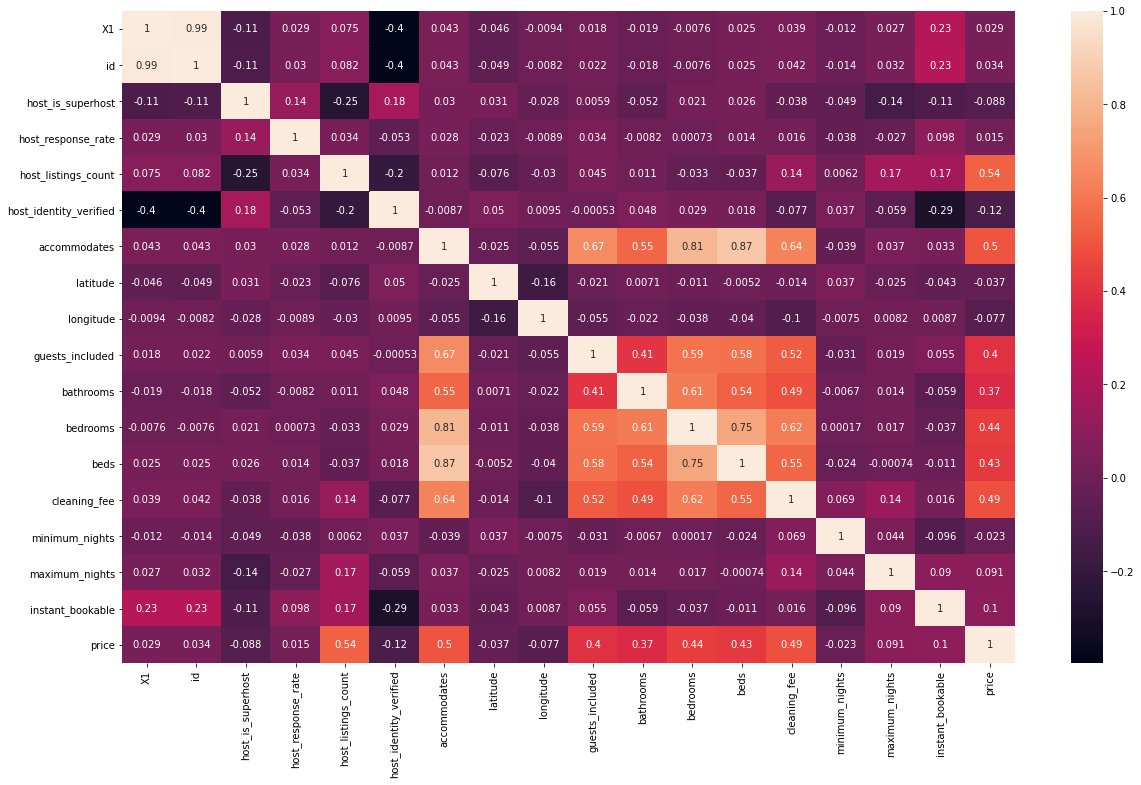

In [17]:
plt.figure(figsize=(20, 12), frameon='True')

cor = price_train.corr()
sns.heatmap(cor, annot=True)

plt.show()

Highly co-related features are- 
    1. BEDROOMS & BEDS (0.75)
    2. ACCOMODATES & BEDROOMS (0.81)
    3. ACCOMODATES & BEDS (0.87)

Highly un-correlated features are-
    1. BEDS & MAXIMUM_NIGHTS
    2. HOST_LISTINGS_COUNT & GUESTS_INCLUDED

In [18]:
price_train.columns

Index(['X1', 'id', 'host_is_superhost', 'host_response_rate',
       'host_response_time', 'host_listings_count', 'host_identity_verified',
       'accommodates', 'neighbourhood_group_cleansed', 'property_type',
       'room_type', 'latitude', 'longitude', 'guests_included', 'bathrooms',
       'bedrooms', 'beds', 'bed_type', 'amenities', 'cleaning_fee',
       'minimum_nights', 'maximum_nights', 'instant_bookable',
       'cancellation_policy', 'price'],
      dtype='object')

In [19]:
price_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3466 entries, 0 to 3465
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   X1                            3466 non-null   int64  
 1   id                            3466 non-null   int64  
 2   host_is_superhost             3466 non-null   bool   
 3   host_response_rate            3466 non-null   int64  
 4   host_response_time            3466 non-null   object 
 5   host_listings_count           3466 non-null   int64  
 6   host_identity_verified        3466 non-null   bool   
 7   accommodates                  3466 non-null   int64  
 8   neighbourhood_group_cleansed  3466 non-null   object 
 9   property_type                 3466 non-null   object 
 10  room_type                     3466 non-null   object 
 11  latitude                      3466 non-null   float64
 12  longitude                     3466 non-null   float64
 13  gue

##### Univariate EDA for price

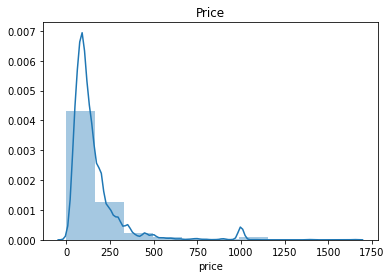

In [20]:
#plot for target variable
plt.title('Price')
sns.distplot(price_train['price'], bins=10)
plt.show()

As we can see that, the values on the axes is not appropriate to judge the change in variance of the variable. Let's try another plot with log of the values in the axes.

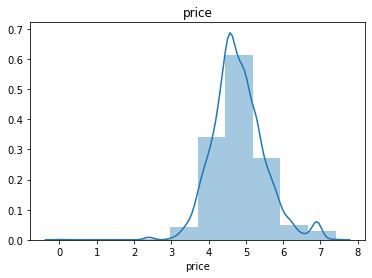

In [21]:
#taking log of the values in both the axes
price_train['price'] = np.log1p(price_train['price'])

#plotting again the target variable
plt.title('price')
sns.distplot(price_train['price'], bins=10)
plt.show()

Now, we can see that the price is normalised.

##### Bivariate EDA

In [22]:
#combining the similar type of the columns in one list
host = ['host_is_superhost', 'host_response_rate', 'host_response_time', 'host_listings_count', 'host_identity_verified']
nights = ['minimum_nights', 'maximum_nights']
types = ['property_type', 'room_type', 'bed_type']
rooms = ['bathrooms', 'bedrooms']
coord = ['latitude', 'longitude']

<Figure size 720x216 with 0 Axes>

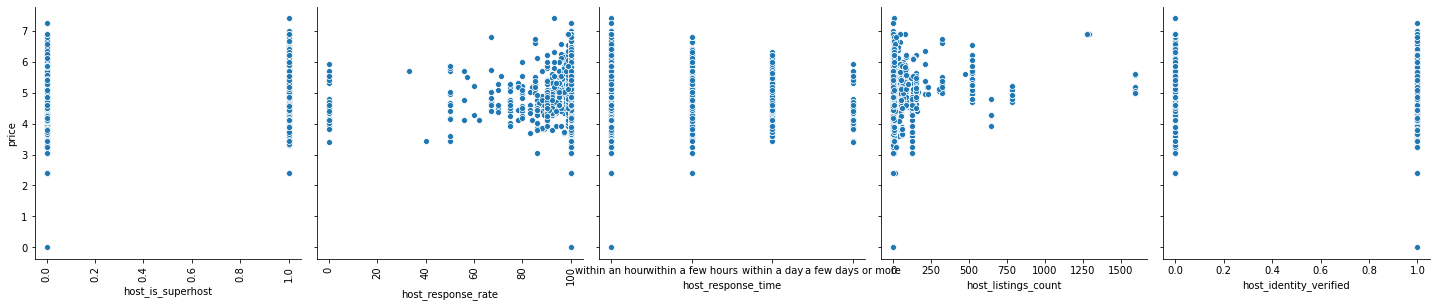

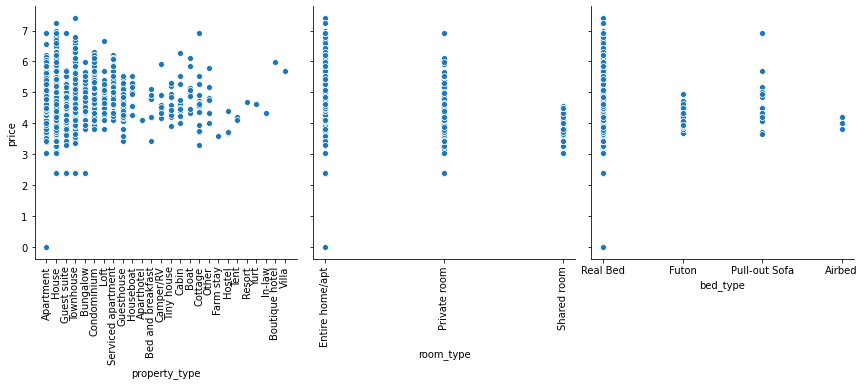

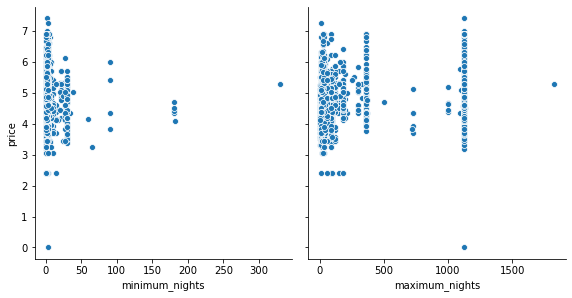

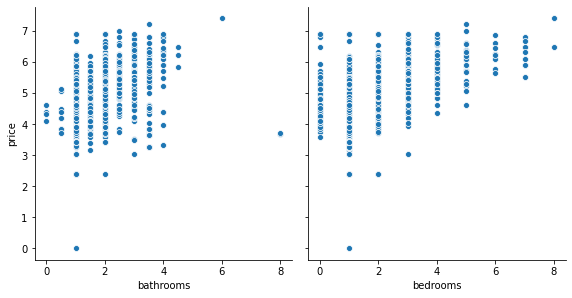

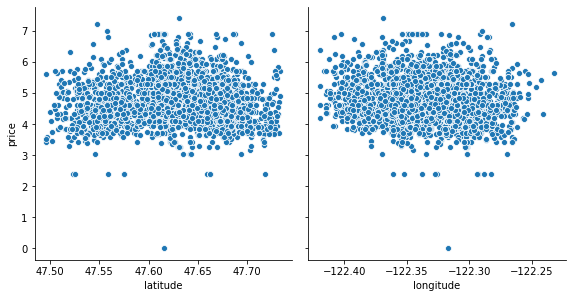

In [23]:
#plotting the above groups in scatter plot
plt.figure(figsize=(10,3))

grid = sns.pairplot(price_train, x_vars=host, y_vars='price',height=4, aspect=1,kind='scatter')
for ax in grid.axes.flat[:2]:
    ax.tick_params(axis='x', labelrotation=90)
    
grid2 = sns.pairplot(price_train, x_vars=types, y_vars='price',height=4, aspect=1,kind='scatter')
for ax in grid2.axes.flat[:2]:
    ax.tick_params(axis='x', labelrotation=90)

sns.pairplot(price_train, x_vars=nights, y_vars='price',height=4, aspect=1,kind='scatter')
sns.pairplot(price_train, x_vars=rooms, y_vars='price',height=4, aspect=1,kind='scatter')
sns.pairplot(price_train, x_vars=coord, y_vars='price',height=4, aspect=1,kind='scatter')

plt.show()

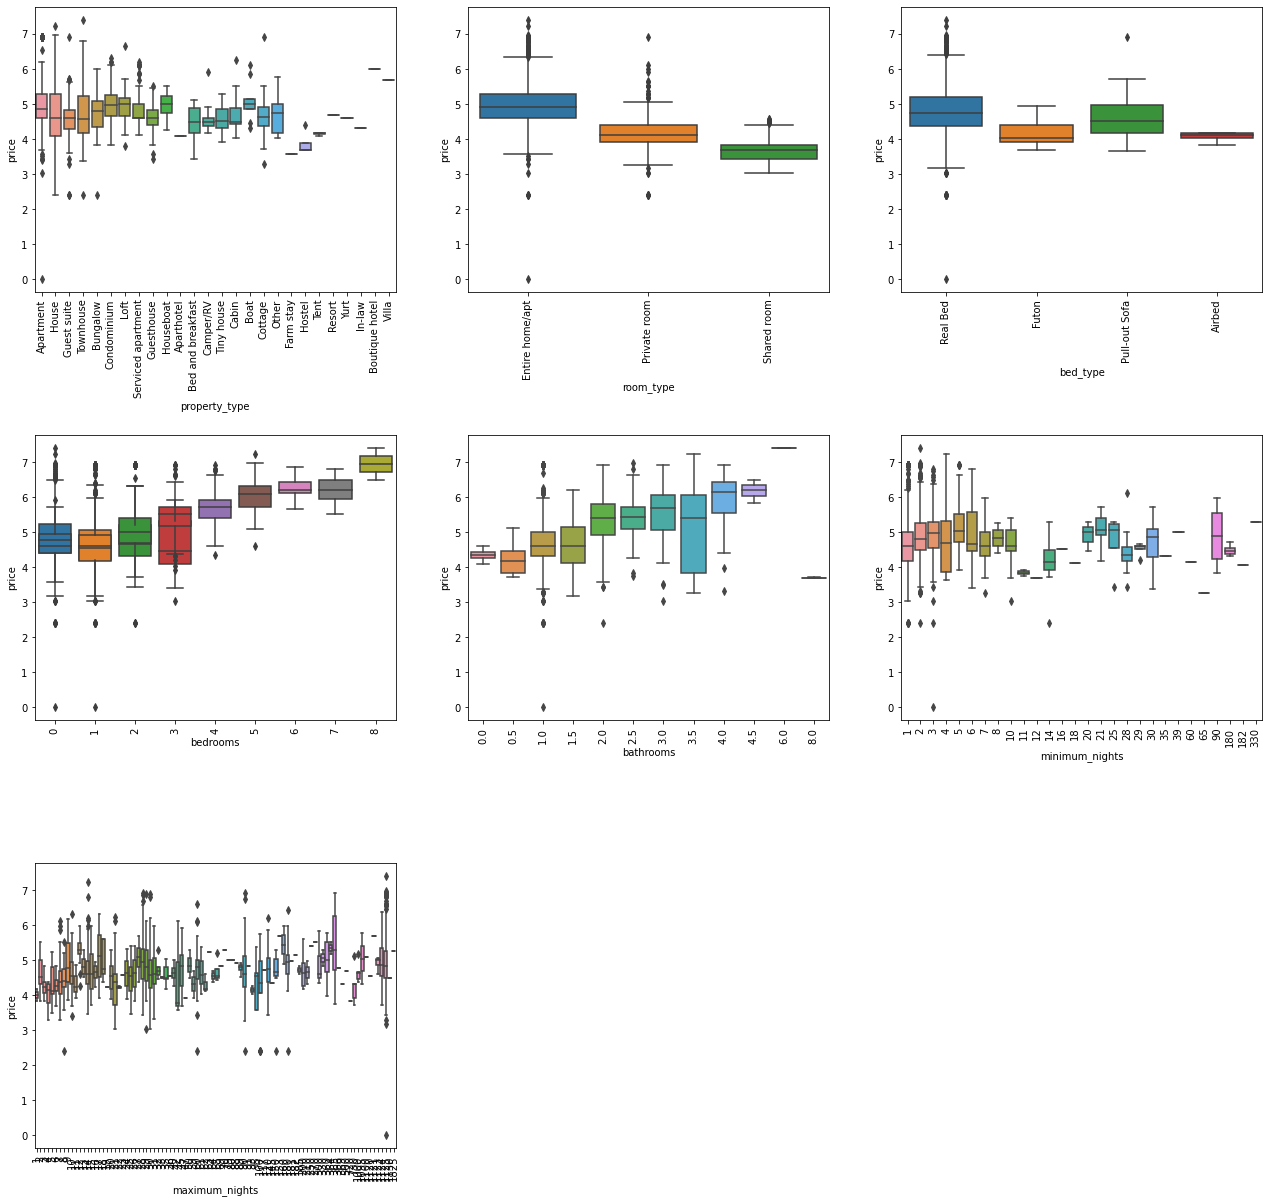

In [24]:
#Creating subplots for all the other features in the dataframe
plt.figure(figsize=(22,21))

plt.subplot(3,3,1)
sns.boxplot(x = 'property_type', y = 'price', data = price_train)
plt.xticks(rotation=90)

plt.subplot(3,3,2)
sns.boxplot(x = 'room_type', y = 'price', data = price_train)
plt.xticks(rotation=90)

plt.subplot(3,3,3)
sns.boxplot(x = 'bed_type', y = 'price', data = price_train)
plt.xticks(rotation=90)

plt.subplot(3,3,4)
sns.boxplot(x = 'host_response_time', y = 'price', data = price_train)
plt.xticks(rotation=90)

plt.subplot(3,3,4)
sns.boxplot(x = 'bedrooms', y = 'price', data = price_train)
plt.xticks(rotation=90)

plt.subplot(3,3,5)
sns.boxplot(x = 'bathrooms', y = 'price', data = price_train)
plt.xticks(rotation=90)

plt.subplot(3,3,6)
sns.boxplot(x = 'minimum_nights', y = 'price', data = price_train)
plt.xticks(rotation=90)

plt.subplot(3,3,7)
sns.boxplot(x = 'maximum_nights', y = 'price', data = price_train)
plt.xticks(rotation=90)

plt.subplots_adjust(hspace=0.5)
plt.show()

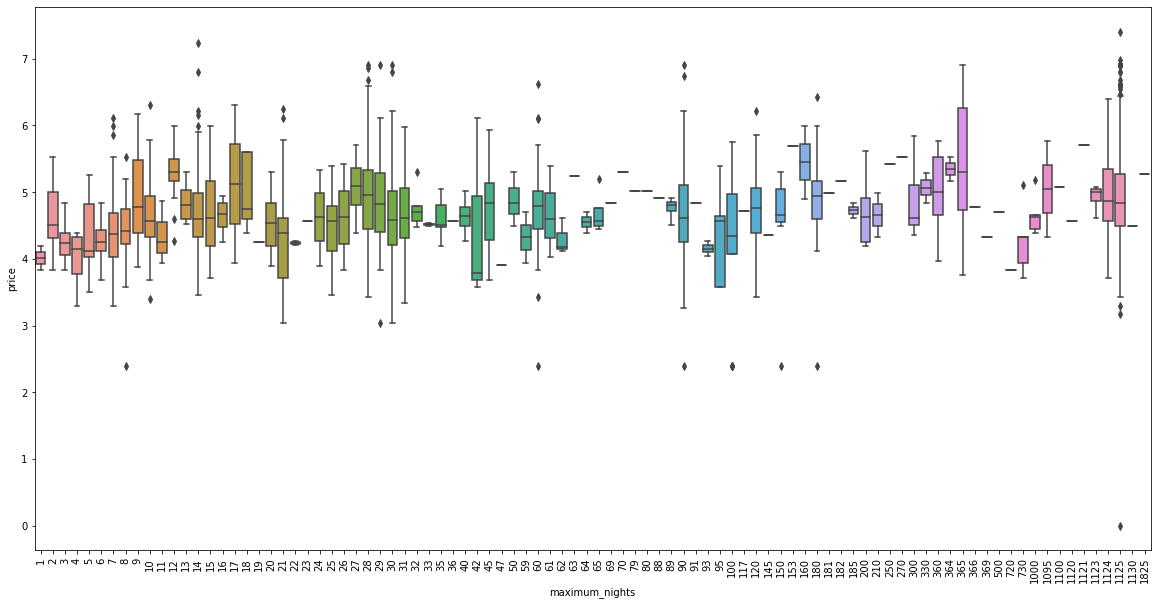

In [25]:
#checking more clearly the maximum nights

plt.figure(figsize = (20, 10))
sns.boxplot(x = 'maximum_nights', y = 'price', data = price_train)
plt.xticks(rotation=90)
plt.show()

##### Stacked Bar plot for relationships

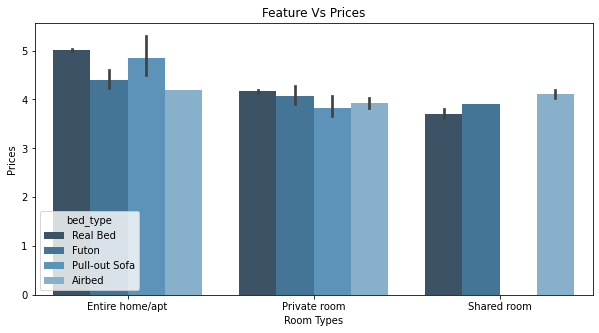

In [26]:
y = price_train['price']
x = price_train['room_type']
h = price_train['bed_type']

fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
sns.barplot(x, y, hue=h, palette="Blues_d") 
  
plt.xlabel("Room Types") 
plt.ylabel("Prices") 
plt.title("Feature Vs Prices") 
plt.show() 

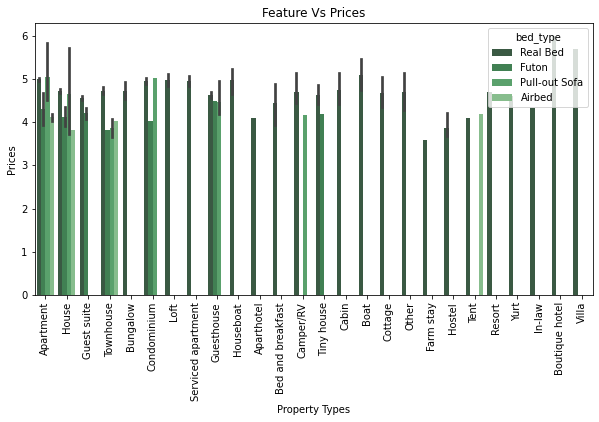

In [27]:
y = price_train['price']
x = price_train['property_type']
h = price_train['bed_type']

fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
sns.barplot(x, y, hue=h, palette="Greens_d")

plt.xlabel("Property Types") 
plt.ylabel("Prices") 
plt.title("Feature Vs Prices") 
plt.xticks(rotation=90)
plt.show()

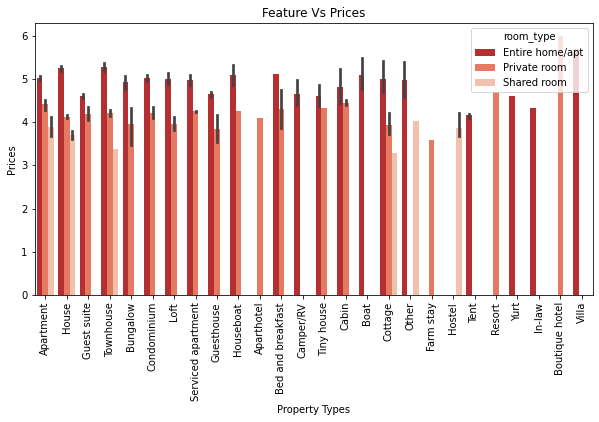

In [28]:
y = price_train['price']
x = price_train['property_type']
h = price_train['room_type']

fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
sns.barplot(x, y, hue=h, palette="Reds_r")

plt.xlabel("Property Types") 
plt.ylabel("Prices") 
plt.title("Feature Vs Prices") 
plt.xticks(rotation=90)
plt.show()

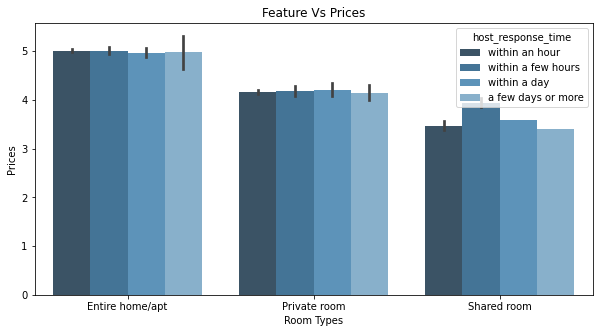

In [29]:
y = price_train['price']
x = price_train['room_type']
h = price_train['host_response_time']

fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
sns.barplot(x, y, hue=h, palette="Blues_d") 
  
plt.xlabel("Room Types") 
plt.ylabel("Prices") 
plt.title("Feature Vs Prices") 
plt.show() 

CHECKING UNIQUE DATA FOR THE HIGHLY COORELEATED VARIABLES

In [30]:
price_train['accommodates'].unique()

array([ 5,  2,  4,  8,  3,  6, 13, 14,  1,  9, 10, 23, 12,  7, 11, 16, 25,
       15, 28], dtype=int64)

In [31]:
price_train['bedrooms'].unique()

array([2, 0, 1, 3, 5, 6, 8, 4, 7], dtype=int64)

In [32]:
price_train['beds'].unique()

array([ 2,  1,  3,  0,  4,  9,  8,  5, 12,  6, 10, 14, 16,  7, 13, 11, 15,
       20], dtype=int64)

PLOTTING THE SAME

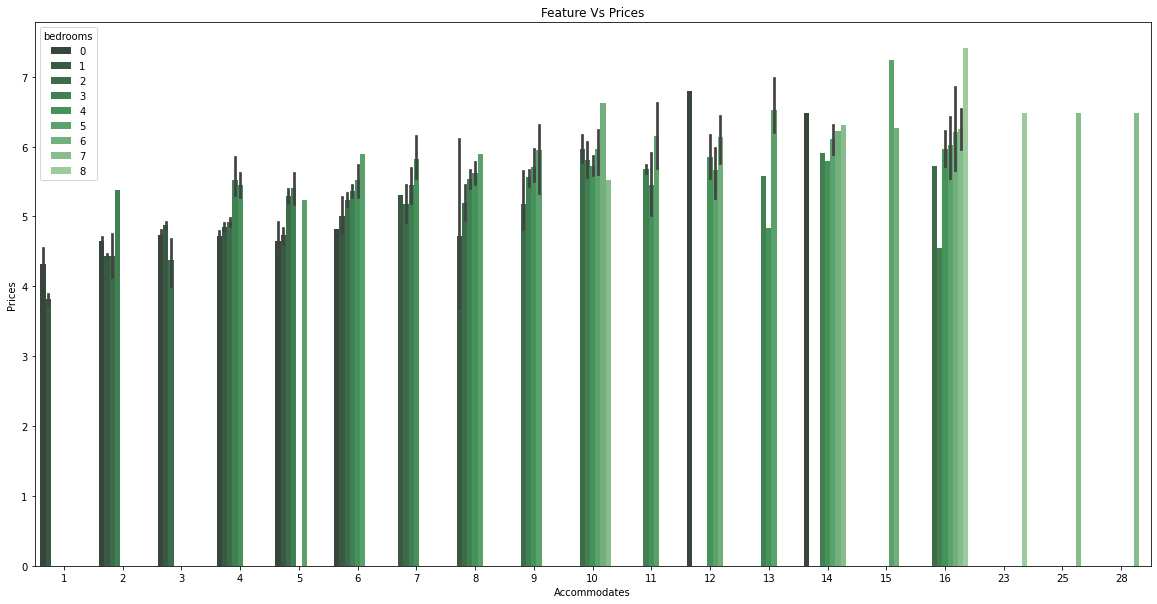

In [33]:
y = price_train['price']
x = price_train['accommodates']
h = price_train['bedrooms']

fig = plt.figure(figsize = (20, 10)) 
  
# creating the bar plot 
sns.barplot(x, y, hue=h, palette="Greens_d") 
  
plt.xlabel("Accommodates") 
plt.ylabel("Prices") 
plt.title("Feature Vs Prices") 
plt.show() 

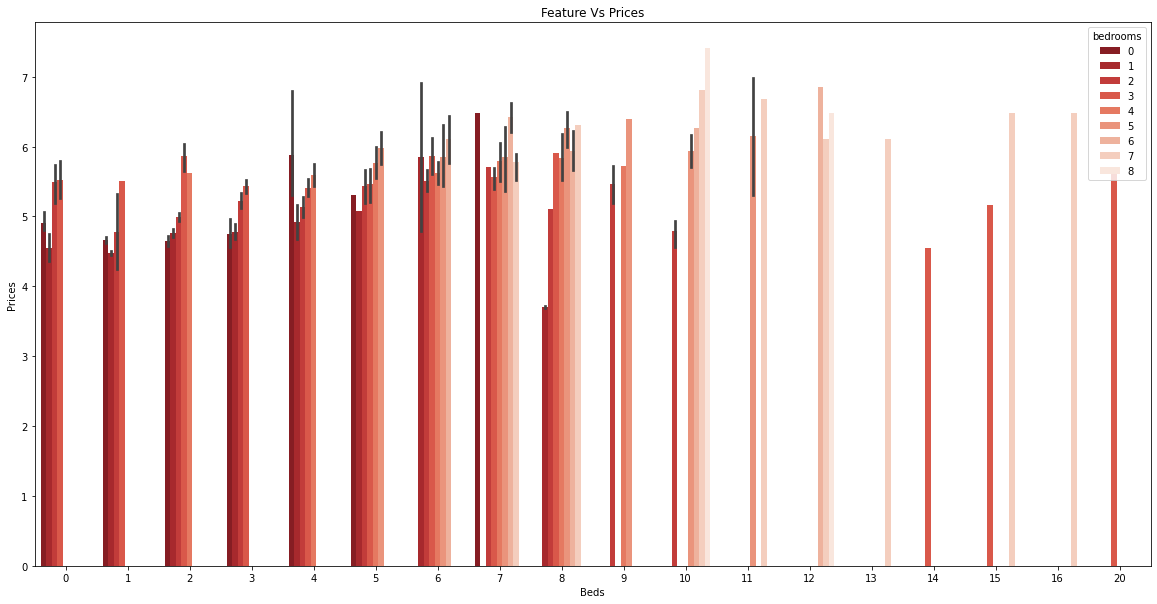

In [34]:
y = price_train['price']
x = price_train['beds']
h = price_train['bedrooms']

fig = plt.figure(figsize = (20, 10)) 
  
# creating the bar plot 
sns.barplot(x, y, hue=h, palette="Reds_r") 
  
plt.xlabel("Beds") 
plt.ylabel("Prices") 
plt.title("Feature Vs Prices") 
plt.show() 

HIGH PRICE FEATURE ANALYSIS - 
    ## Univariate EDA
        1. Price is the target variable.
        2. Price values are left-skewed.
        3. Left-skewed data is handled after applying log values.
    ## Bivariate EDA (variables at HIGH prices)
        1. Real_bed type
        2. Entire home/apt
        3. Number of Bedrooms = 8
    ## Stacked EDA (for relationship between the variables at HIGH prices)
        1. Real_bed at Entire home/apt has high price
        2. Real_bed at Villa and Boutique hotel have high price
        3. Private Room at Boutique Hotel has high price
        4. Entire home/apt at Villa has high price
        5. host_response_time doesn't show much difference in with the rooms
        6. Number of bedrooms increases with increase in the accommodates, hence price increases
        7. Large number of bedrooms implies more number of beds required, therefore price increases

#### Step - 4 : Data Preparation

In [35]:
df = pd.concat([price_train, price_test], axis=1)
df.head()

,X1,id,host_is_superhost,host_response_rate,host_response_time,host_listings_count,host_identity_verified,accommodates,neighbourhood_group_cleansed,property_type,...,bathrooms,bedrooms,beds,bed_type,amenities,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,cancellation_policy
0,5460,22146017,False,99,within an hour,521,False,5,Downtown,Apartment,...,1.0,2.0,2.0,Real Bed,"{TV,Internet,Wifi,Kitchen,""Free street parking...",$85.00,3.0,300.0,True,moderate
1,4143,18638163,True,100,within an hour,1,True,2,Queen Anne,House,...,1.0,1.0,2.0,Real Bed,"{TV,Wifi,""Free parking on premises"",""Pets allo...",$40.00,2.0,1125.0,True,moderate
2,5802,22734110,True,100,within an hour,1,False,4,Rainier Valley,Guest suite,...,1.0,1.0,1.0,Real Bed,"{Wifi,Kitchen,""Free parking on premises"",Heati...",$150.00,5.0,120.0,False,strict_14_with_grace_period
3,776,3946674,True,90,within a few hours,1,True,2,Central Area,House,...,1.0,1.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",$75.00,1.0,30.0,False,strict_14_with_grace_period
4,6064,23610186,True,100,within an hour,4,True,8,Beacon Hill,House,...,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",0,1.0,3.0,False,flexible


In [36]:
df.columns

Index(['X1', 'id', 'host_is_superhost', 'host_response_rate',
       'host_response_time', 'host_listings_count', 'host_identity_verified',
       'accommodates', 'neighbourhood_group_cleansed', 'property_type',
       'room_type', 'latitude', 'longitude', 'guests_included', 'bathrooms',
       'bedrooms', 'beds', 'bed_type', 'amenities', 'cleaning_fee',
       'minimum_nights', 'maximum_nights', 'instant_bookable',
       'cancellation_policy', 'price', 'X1', 'id', 'host_is_superhost',
       'host_response_rate', 'host_response_time', 'host_listings_count',
       'host_identity_verified', 'accommodates',
       'neighbourhood_group_cleansed', 'property_type', 'room_type',
       'latitude', 'longitude', 'guests_included', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'amenities', 'cleaning_fee', 'minimum_nights',
       'maximum_nights', 'instant_bookable', 'cancellation_policy'],
      dtype='object')

In [37]:
df.shape

(3466, 49)

In [38]:
df = df.loc[:,~df.columns.duplicated()]

In [39]:
df.shape

(3466, 25)

In [40]:
df.columns

Index(['X1', 'id', 'host_is_superhost', 'host_response_rate',
       'host_response_time', 'host_listings_count', 'host_identity_verified',
       'accommodates', 'neighbourhood_group_cleansed', 'property_type',
       'room_type', 'latitude', 'longitude', 'guests_included', 'bathrooms',
       'bedrooms', 'beds', 'bed_type', 'amenities', 'cleaning_fee',
       'minimum_nights', 'maximum_nights', 'instant_bookable',
       'cancellation_policy', 'price'],
      dtype='object')

In [41]:
df.dtypes

X1                                int64
id                                int64
host_is_superhost                  bool
host_response_rate                int64
host_response_time               object
host_listings_count               int64
host_identity_verified             bool
accommodates                      int64
neighbourhood_group_cleansed     object
property_type                    object
room_type                        object
latitude                        float64
longitude                       float64
guests_included                   int64
bathrooms                       float64
bedrooms                          int64
beds                              int64
bed_type                         object
amenities                        object
cleaning_fee                    float64
minimum_nights                    int64
maximum_nights                    int64
instant_bookable                   bool
cancellation_policy              object
price                           float64


In [42]:
df.shape

(3466, 25)

In [43]:
#dummy variables
neighbourhood_group_cleansed_dummy = pd.get_dummies(df['neighbourhood_group_cleansed'], prefix='neighbourhood_group_cleansed', drop_first = True)
df = pd.concat([df, neighbourhood_group_cleansed_dummy], axis = 1)
df = df.drop(['neighbourhood_group_cleansed'], axis=1)

property_type_dummy = pd.get_dummies(df['property_type'], prefix='property_type', drop_first = True)
df = pd.concat([df, property_type_dummy], axis = 1)
df = df.drop(['property_type'], axis=1)

room_type_dummy = pd.get_dummies(df['room_type'], prefix='room_type', drop_first = True)
df = pd.concat([df, room_type_dummy], axis = 1)
df = df.drop(['room_type'], axis=1)

bed_type_dummy = pd.get_dummies(df['bed_type'], prefix='bed_type', drop_first = True)
df = pd.concat([df, bed_type_dummy], axis = 1)
df = df.drop(['bed_type'], axis=1)

cancellation_policy_dummy = pd.get_dummies(df['cancellation_policy'], prefix='cancellation_policy', drop_first = True)
df = pd.concat([df, cancellation_policy_dummy], axis = 1)
df = df.drop(['cancellation_policy'], axis=1)

instant_bookable_dummy = pd.get_dummies(df['instant_bookable'], prefix='instant_bookable', drop_first = True)
df = pd.concat([df, instant_bookable_dummy], axis = 1)
df = df.drop(['instant_bookable'], axis=1)

In [44]:
#Scale the columns
min_max_scaler = preprocessing.MinMaxScaler()
df['accommodates'] = min_max_scaler.fit_transform(df[['accommodates']])
df['bathrooms'] = min_max_scaler.fit_transform(df[['bathrooms']])
df['bedrooms'] = min_max_scaler.fit_transform(df[['bedrooms']])

In [45]:
df.head(10)

,X1,id,host_is_superhost,host_response_rate,host_response_time,host_listings_count,host_identity_verified,accommodates,latitude,longitude,...,room_type_Shared room,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,instant_bookable_True
0,5460,22146017,False,99,within an hour,521,False,0.148148,47.612163,-122.338239,...,0,0,0,1,0,1,0,0,0,1
1,4143,18638163,True,100,within an hour,1,True,0.037037,47.640827,-122.355248,...,0,0,0,1,1,0,0,0,0,1
2,5802,22734110,True,100,within an hour,1,False,0.111111,47.549007,-122.273951,...,0,0,0,1,1,0,0,0,0,0
3,776,3946674,True,90,within a few hours,1,True,0.037037,47.601922,-122.307979,...,0,0,0,1,0,0,0,0,0,0
4,6064,23610186,True,100,within an hour,4,True,0.259259,47.552311,-122.293409,...,0,0,0,1,0,0,0,0,0,0
5,2757,13533608,False,100,within a few hours,4,True,0.259259,47.649938,-122.383192,...,0,0,0,1,0,0,1,0,0,0
6,7786,29396738,True,100,within an hour,1,False,0.074074,47.678508,-122.365246,...,0,0,0,1,1,0,0,0,0,0
7,7012,26667492,False,100,within an hour,9,False,0.111111,47.612819,-122.328973,...,0,0,0,1,0,0,1,0,0,1
8,6019,23417458,True,100,within an hour,2,False,0.037037,47.606281,-122.339739,...,0,0,0,1,0,0,1,0,0,1
9,3766,17465443,False,99,within an hour,152,False,0.037037,47.612551,-122.320454,...,0,0,0,1,0,0,1,0,0,0


In [46]:
df.columns

Index(['X1', 'id', 'host_is_superhost', 'host_response_rate',
       'host_response_time', 'host_listings_count', 'host_identity_verified',
       'accommodates', 'latitude', 'longitude', 'guests_included', 'bathrooms',
       'bedrooms', 'beds', 'amenities', 'cleaning_fee', 'minimum_nights',
       'maximum_nights', 'price', 'neighbourhood_group_cleansed_Beacon Hill',
       'neighbourhood_group_cleansed_Capitol Hill',
       'neighbourhood_group_cleansed_Cascade',
       'neighbourhood_group_cleansed_Central Area',
       'neighbourhood_group_cleansed_Delridge',
       'neighbourhood_group_cleansed_Downtown',
       'neighbourhood_group_cleansed_Interbay',
       'neighbourhood_group_cleansed_Lake City',
       'neighbourhood_group_cleansed_Magnolia',
       'neighbourhood_group_cleansed_Northgate',
       'neighbourhood_group_cleansed_Other neighborhoods',
       'neighbourhood_group_cleansed_Queen Anne',
       'neighbourhood_group_cleansed_Rainier Valley',
       'neighbourhood_gr

In [47]:
#dropping unwanted columns
col_to_be_deleted = ['host_response_time', 'host_identity_verified', 'host_is_superhost', 'latitude', 
                     'longitude', 'amenities', 'cleaning_fee', 'X1']
df = df.drop(col_to_be_deleted, axis=1)
df.head(5)

,id,host_response_rate,host_listings_count,accommodates,guests_included,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,...,room_type_Shared room,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,instant_bookable_True
0,22146017,99,521,0.148148,4,0.2500,0.250,2,2,1125,...,0,0,0,1,0,1,0,0,0,1
1,18638163,100,1,0.037037,1,0.1250,0.000,1,2,30,...,0,0,0,1,1,0,0,0,0,1
2,22734110,100,1,0.111111,2,0.1250,0.125,2,2,28,...,0,0,0,1,1,0,0,0,0,0
3,3946674,90,1,0.037037,1,0.1250,0.125,1,2,30,...,0,0,0,1,0,0,0,0,0,0
4,23610186,100,4,0.259259,6,0.3125,0.375,3,2,12,...,0,0,0,1,0,0,0,0,0,0


In [48]:
df.columns

Index(['id', 'host_response_rate', 'host_listings_count', 'accommodates',
       'guests_included', 'bathrooms', 'bedrooms', 'beds', 'minimum_nights',
       'maximum_nights', 'price', 'neighbourhood_group_cleansed_Beacon Hill',
       'neighbourhood_group_cleansed_Capitol Hill',
       'neighbourhood_group_cleansed_Cascade',
       'neighbourhood_group_cleansed_Central Area',
       'neighbourhood_group_cleansed_Delridge',
       'neighbourhood_group_cleansed_Downtown',
       'neighbourhood_group_cleansed_Interbay',
       'neighbourhood_group_cleansed_Lake City',
       'neighbourhood_group_cleansed_Magnolia',
       'neighbourhood_group_cleansed_Northgate',
       'neighbourhood_group_cleansed_Other neighborhoods',
       'neighbourhood_group_cleansed_Queen Anne',
       'neighbourhood_group_cleansed_Rainier Valley',
       'neighbourhood_group_cleansed_Seward Park',
       'neighbourhood_group_cleansed_University District',
       'neighbourhood_group_cleansed_West Seattle', 'prop

#### Step - 4 : Building Model and Evaluation

In [49]:
X = df.drop(['price'], axis=1)
y = df['price']

In [50]:
X.head()

,id,host_response_rate,host_listings_count,accommodates,guests_included,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,...,room_type_Shared room,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,instant_bookable_True
0,22146017,99,521,0.148148,4,0.2500,0.250,2,2,1125,...,0,0,0,1,0,1,0,0,0,1
1,18638163,100,1,0.037037,1,0.1250,0.000,1,2,30,...,0,0,0,1,1,0,0,0,0,1
2,22734110,100,1,0.111111,2,0.1250,0.125,2,2,28,...,0,0,0,1,1,0,0,0,0,0
3,3946674,90,1,0.037037,1,0.1250,0.125,1,2,30,...,0,0,0,1,0,0,0,0,0,0
4,23610186,100,4,0.259259,6,0.3125,0.375,3,2,12,...,0,0,0,1,0,0,0,0,0,0


In [51]:
y.head()

0    5.634790
1    4.605170
2    4.330733
3    4.262680
4    5.493061
Name: price, dtype: float64

In [52]:
# train and test - x and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [53]:
X_train

,id,host_response_rate,host_listings_count,accommodates,guests_included,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,...,room_type_Shared room,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,instant_bookable_True
1042,31623201,100,1,0.185185,1,0.1250,0.250,3,2,1125,...,0,0,0,1,0,0,1,0,0,1
1350,26140914,100,3,0.000000,1,0.1250,0.125,1,1,1125,...,0,0,0,1,1,0,0,0,0,1
2997,15615336,100,2,0.037037,2,0.1875,0.125,1,2,1125,...,0,0,0,1,0,0,1,0,0,1
2832,24334408,99,521,0.222222,6,0.2500,0.375,3,2,1125,...,0,0,0,1,0,1,0,0,0,1
2817,14186845,100,1,0.037037,1,0.1250,0.000,1,2,60,...,0,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,20899115,100,1,0.037037,1,0.1250,0.000,1,1,1125,...,0,0,0,1,1,0,0,0,0,1
1130,14223471,100,2,0.111111,1,0.1875,0.125,1,3,14,...,0,0,0,1,0,0,0,0,0,1
1294,15753740,100,1,0.111111,4,0.3125,0.375,2,3,14,...,0,0,0,1,1,0,0,0,0,0
860,30130681,100,4,0.074074,2,0.1250,0.000,1,1,1125,...,0,0,0,1,1,0,0,0,0,1


In [54]:
X_test

,id,host_response_rate,host_listings_count,accommodates,guests_included,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,...,room_type_Shared room,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,instant_bookable_True
2614,22419479,100,10,0.111111,3,0.1250,0.125,2,1,1125,...,0,0,0,1,0,0,1,0,0,1
410,566435,90,4,0.037037,2,0.5000,0.125,1,2,365,...,0,0,0,1,0,0,0,0,0,1
3109,9512909,100,1,0.074074,2,0.1250,0.125,3,1,1125,...,0,0,0,1,0,0,0,0,0,1
3447,21011650,100,100,0.074074,1,0.1250,0.125,1,2,1125,...,0,0,0,1,0,0,1,0,0,1
1283,24561629,100,8,0.037037,1,0.2500,0.125,1,2,14,...,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2470,31148038,99,81,0.111111,4,0.1250,0.125,2,1,365,...,0,0,0,1,0,0,0,1,0,1
2765,6079581,100,1,0.222222,6,0.3125,0.375,5,4,28,...,0,0,0,1,1,0,0,0,0,0
104,7901331,100,3,0.148148,1,0.1250,0.250,3,10,28,...,0,0,0,1,1,0,0,0,0,0
2582,24253149,100,1,0.259259,1,0.3750,0.500,4,3,1125,...,0,0,0,1,1,0,0,0,0,1


In [55]:
y_train

1042    4.836282
1350    4.290459
2997    4.795791
2832    6.042633
2817    4.595120
          ...   
1095    4.454347
1130    5.703782
1294    5.846439
860     5.303305
3174    5.438079
Name: price, Length: 2426, dtype: float64

In [56]:
y_test

2614    4.595120
410     4.394449
3109    4.356709
3447    5.278115
1283    4.510860
          ...   
2470    5.049856
2765    5.225747
104     5.247024
2582    4.615121
1403    3.931826
Name: price, Length: 1040, dtype: float64

###### MODEL-1 : Linear Regression

In [57]:
# linear regression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [58]:
#Linear Regression
lm_mse = metrics.mean_squared_error(y_test, lm.predict(X_test))
lm_mse = np.sqrt(lm_mse)

print('Linear Regression MSE test: %.3f'% lm_mse)

Linear Regression MSE test: 0.396


###### MODEL-2 : Decision Tree Regressor

In [59]:
#Train decision tree
tree_reg = DecisionTreeRegressor() 
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [60]:
#calculate scores for the model
y_train_preds = tree_reg.predict(X_train)
y_test_preds = tree_reg.predict(X_test)

dt_mse = metrics.mean_squared_error(y_test, tree_reg.predict(X_test))
dt_mse = np.sqrt(dt_mse)
print('Decision Tree MSE test: %.3f'% dt_mse)
print('Decision Tree R^2 test: %.3f' % (
        metrics.r2_score(y_test, y_test_preds)))

Decision Tree MSE test: 0.499
Decision Tree R^2 test: 0.477


###### MODEL-3 : Random Forest Regressor

In [61]:
#RF regressor model
forest = RandomForestRegressor(n_estimators=200,
                               max_features='sqrt',
                               criterion='mse', 
                               random_state=42, 
                               n_jobs=1)
forest.fit(X_train, y_train.squeeze())

#calculate scores for the model
y_train_preds = forest.predict(X_train)
y_test_preds = forest.predict(X_test)

print('Random Forest MSE train: %.3f, test: %.3f' % (
        np.sqrt(mean_squared_error(y_train, y_train_preds)),
        np.sqrt(mean_squared_error(y_test, y_test_preds))))
print('Random Forest R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_preds),
        r2_score(y_test, y_test_preds)))

Random Forest MSE train: 0.143, test: 0.351
Random Forest R^2 train: 0.958, test: 0.741


Random Forest model shows far better MSE than any other models.

Let's now evaluate for the test data.

#### Step - 5 : Feature Selection

Proceeding with Random Forest!

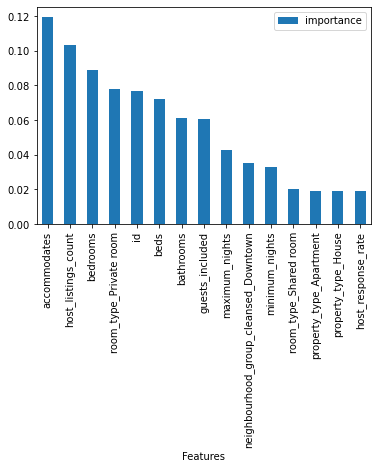

In [62]:
coefficients = pd.DataFrame({'Features': X_train.columns, 'importance': forest.feature_importances_})
_ = coefficients.sort_values('importance', ascending=False)[:15].plot(x='Features', y='importance', kind='bar')

In [63]:
#store the rf model
with open('model_rf.pkl', 'wb') as fid:
    pickle.dump(forest, fid)

#### Submission File

In [64]:
output = pd.DataFrame(data={
    "ID": X_test['id'],
    "Price": y_test_preds
})

output.to_csv(path_or_buf=r'price_submission.csv', index=False)

In [65]:
output.head()

,ID,Price
2614,22419479,5.052915
410,566435,4.296670
3109,9512909,4.597333
3447,21011650,5.278115
1283,24561629,4.266664
